In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt
import glob
import collections

In [2]:
metadata = pd.read_csv("/home/srashmi/Documents/tonsil_atlas_citeseq_vdj_20210505/01-cellranger_mapping/data/tonsil_atlas_metadata.csv")
df = pd.DataFrame(metadata, columns= ['subproject', 'gem_id']).drop_duplicates()
subproject_gem_id_list = df.values.tolist()
print(subproject_gem_id_list)

[['BCLLATLAS_33', 'mLuLpVxi_v0fLyotc'], ['BCLLATLAS_33', 'ifZOgenn_TpMNTvBa'], ['BCLLATLAS_38', 'WToIzInl_LudU7hVX'], ['BCLLATLAS_38', 'B20O1bh7_VmM99YZJ'], ['BCLLATLAS_38', 'rdFRFhrU_ZdYeOZlf'], ['BCLLATLAS_40', 'CfdzDgHe_IMOTbrIP'], ['BCLLATLAS_40', 'uqJAc4r9_BYScOzxA'], ['BCLLATLAS_40', 'ujxNn2kq_lG2VLlYd'], ['BCLLATLAS_40', 'pseMjZsU_qgZNOhOQ'], ['BCLLATLAS_40', 'LxBTpkPO_8TcNpBg4'], ['BCLLATLAS_46', 'SOJZt9kY_qpnv20QN'], ['BCLLATLAS_46', 'HjqdPU0E_aGDmEY5F'], ['BCLLATLAS_46', 'XV1SLOR2_HRF5D9A3'], ['BCLLATLAS_46', 'BZEECBEG_GXkc6Q1y'], ['BCLLATLAS_46', 'KETfaLdx_Ub1mtE13']]


In [3]:
adatas = []
for sample_info_list in subproject_gem_id_list:
	subproject = sample_info_list[0]
	gem_id = sample_info_list[1]
	sample = subproject + "_" + gem_id    
	bcr_file="/home/srashmi/Documents/tonsil_atlas_citeseq_vdj_20210505/01-cellranger_mapping/projects/"+subproject+"/jobs/"+gem_id+"/"+gem_id+"/outs/per_sample_outs/"+gem_id+"/vdj_b/filtered_contig_annotations.csv"	
	ad = pd.read_csv(bcr_file)
	ad["barcode"] = sample + "_" + ad["barcode"]
	adatas.append(ad)

adatas = pd.concat(adatas)
adatas.to_csv("bcr_bcll.csv")
adata_bcr = ir.io.read_10x_vdj("bcr_bcll.csv")

... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical


In [4]:
gex_file="objects/PC_tonsil_cite_seq_annotated.h5ad"	
adata = sc.read_h5ad(gex_file)
adata.var_names_make_unique()
ir.pp.merge_with_ir(adata, adata_bcr)
adata

... storing 'orig.ident' as categorical
... storing 'sample' as categorical
... storing 'subproject' as categorical
... storing 'gemid' as categorical
... storing 'donor_id' as categorical
... storing 'genotype_based_doublet_flag' as categorical
... storing 'genotype_based_unassigned_flag' as categorical
... storing 'scrublet_predicted_doublet' as categorical
... storing 'inkt_evidence' as categorical
... storing 'mait_evidence' as categorical
... storing 'tcr_flag' as categorical
... storing 'bcr_flag' as categorical
... storing 'Phase' as categorical
... storing 'annotation' as categorical
... storing 'repertoire_flag' as categorical
... storing 'PC_annotation_level_5' as categorical
... storing 'multi_chain' as categorical


AnnData object with n_obs × n_vars = 1853 × 192
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'sample', 'subproject', 'gemid', 'donor_id', 'genotype_based_doublet_flag', 'genotype_based_unassigned_flag', 'scrublet_doublet_scores', 'scrublet_predicted_doublet', 'inkt_evidence', 'mait_evidence', 'tcr_flag', 'bcr_flag', 'percent.mt', 'log10GenesPerUMI', 'S.Score', 'G2M.Score', 'Phase', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.1', 'wsnn_res.0.5', 'wsnn_res.1', 'wsnn_res.1.5', 'wsnn_res.2', 'seurat_clusters', 'annotation', 'annotation_prob', 'UMAP1', 'UMAP2', 'repertoire_flag', 'PC_annotation_level_5', 'PC_annotation_probability', 'PC_UMAP1', 'PC_UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ

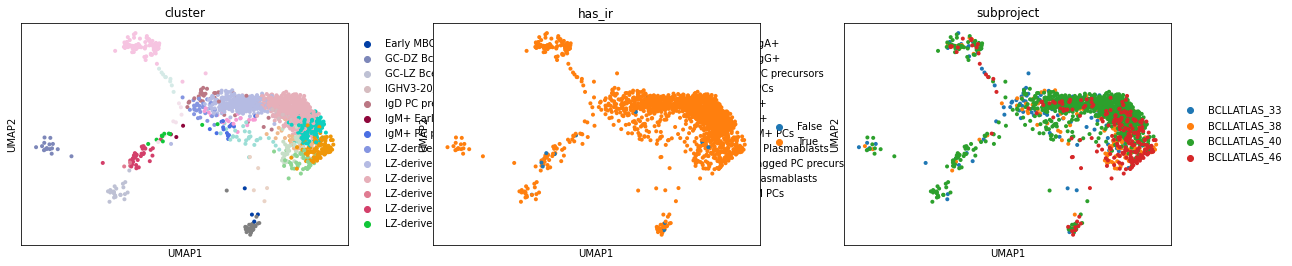

In [5]:
adata.obs["cluster"] = adata.obs['PC_annotation_level_5']
adata.obs['cluster'] = adata.obs['cluster'].astype('category').values
adata.obsm['umap'] = np.array(adata.obs[['PC_UMAP1', 'PC_UMAP2']])
sc.pl.umap(adata, color=["cluster", "has_ir","subproject"])

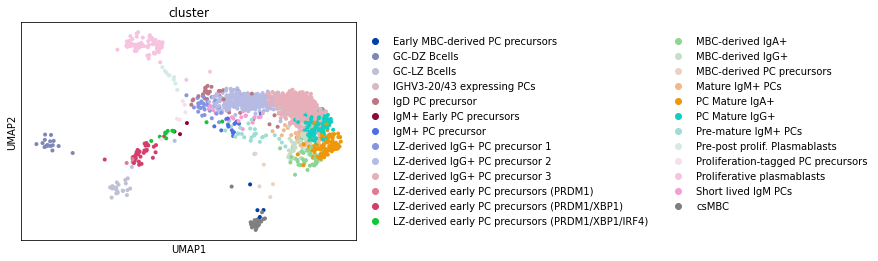

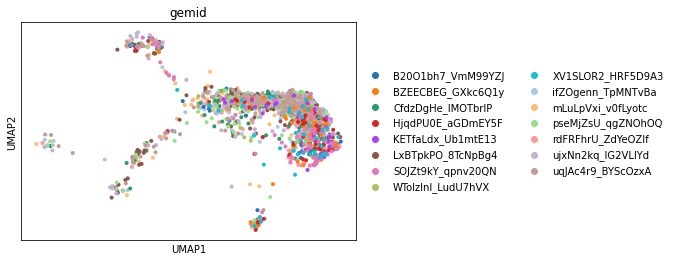

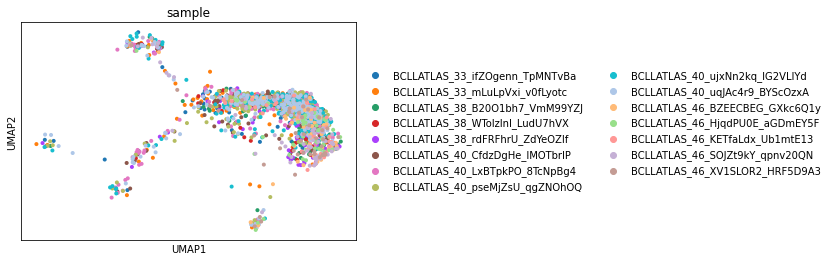

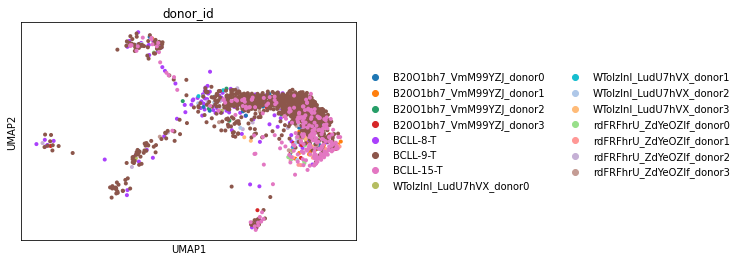

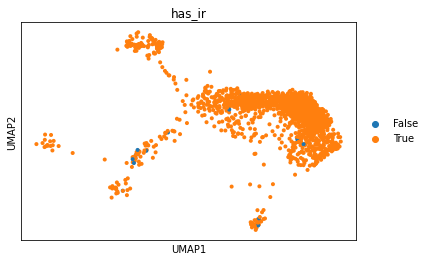

In [6]:
sc.pl.umap(adata, color=['cluster'])
sc.pl.umap(adata, color=["gemid"])
sc.pl.umap(adata, color=["sample"])
sc.pl.umap(adata, color=["donor_id"])
sc.pl.umap(adata, color=["has_ir"])

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


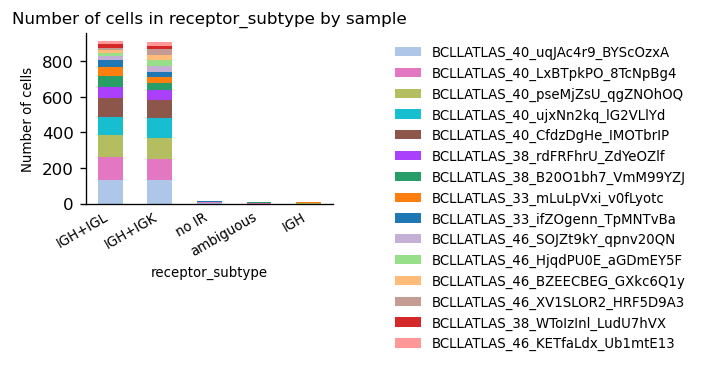

In [7]:
ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="sample")
plt.show()

In [8]:
print(
    "Fraction of cells with more than one pair of BCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of BCRs: 0.02


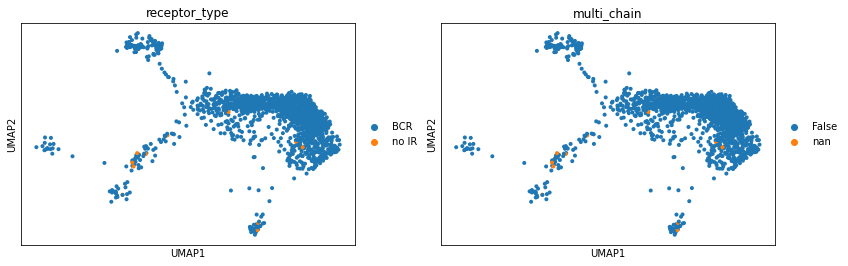

/home/srashmi/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
sc.pl.umap(adata, color=['receptor_type',"multi_chain"])
adata = adata[adata.obs["multi_chain"] != "True", :].copy() #Remove the ones with multi-chain as they can be douplets
plt.show()

Number of BCR (with Doublets) : 1839
Number of BCR (without Doublets) : 1839


Trying to set attribute `.obs` of view, copying.
... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


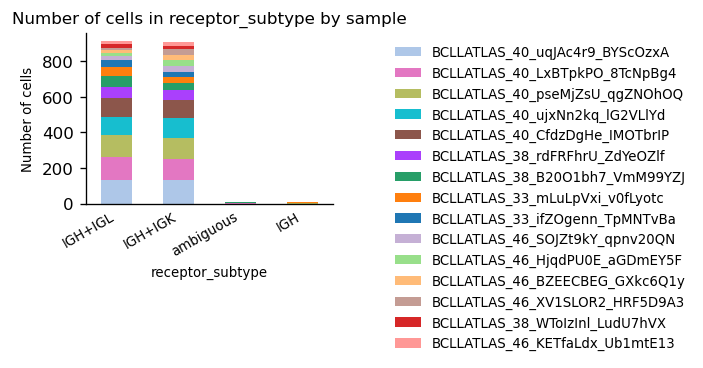

In [10]:
BCR_adata_with_doublets = adata[adata.obs['receptor_type'] == "BCR"]
BCR_adata = BCR_adata_with_doublets[(BCR_adata_with_doublets.obs['genotype_based_doublet_flag'] != "T") & (BCR_adata_with_doublets.obs['genotype_based_unassigned_flag'] != "T") & (BCR_adata_with_doublets.obs['scrublet_predicted_doublet'] != "True")]
print("Number of BCR (with Doublets) : "+str(len(BCR_adata_with_doublets.obs)))
print("Number of BCR (without Doublets) : "+str(len(BCR_adata.obs)))
ir.tl.chain_qc(BCR_adata)
ir.pl.group_abundance(BCR_adata, groupby="receptor_subtype", target_col="sample")
plt.show()

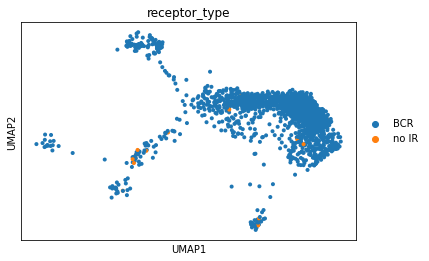

In [11]:
sc.pl.umap(adata, color=['receptor_type'])

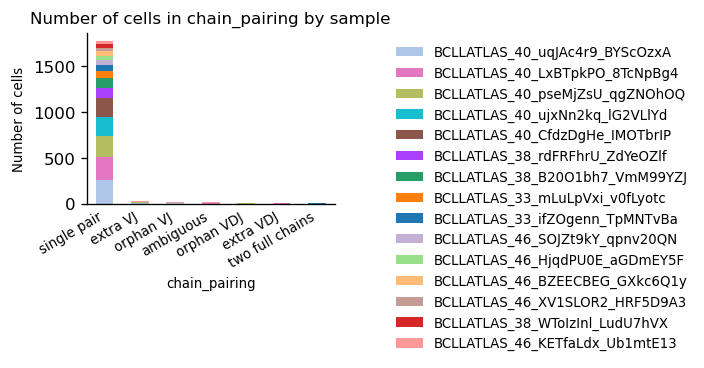

In [12]:
ir.pl.group_abundance(BCR_adata, groupby="chain_pairing", target_col="sample")
plt.show()

In [13]:
print(
    "Fraction of cells with more than one pair of BCRs: {:.2f}".format(
        np.sum(
            BCR_adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / BCR_adata.n_obs
    )
)

Fraction of cells with more than one pair of BCRs: 0.02


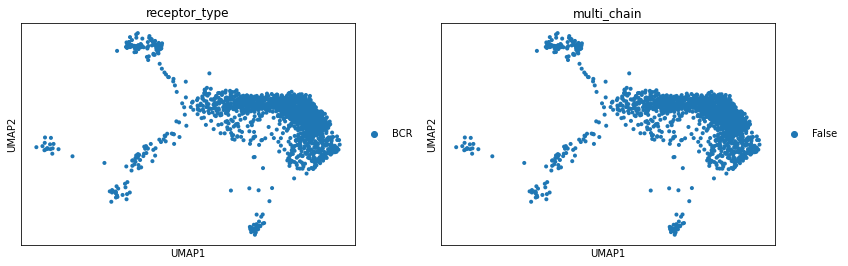

In [14]:
sc.pl.umap(BCR_adata, color=["receptor_type","multi_chain"])
BCR_adata = BCR_adata[BCR_adata.obs["multi_chain"] != "True", :].copy() #Remove the ones with multi-chain as they can be douplets
plt.show()

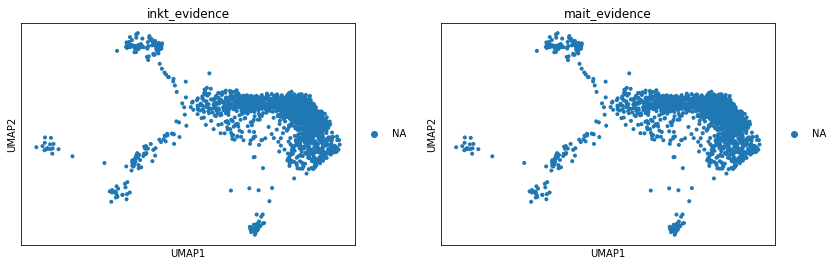

In [15]:
sc.pl.umap(adata, color=["inkt_evidence", "mait_evidence"])

In [16]:
ir.pp.ir_neighbors(BCR_adata, receptor_arms="all", dual_ir="primary_only")
ir.tl.define_clonotypes(BCR_adata)

100%|██████████| 2725/2725 [00:00<00:00, 124079.71it/s]


... storing 'clonotype' as categorical


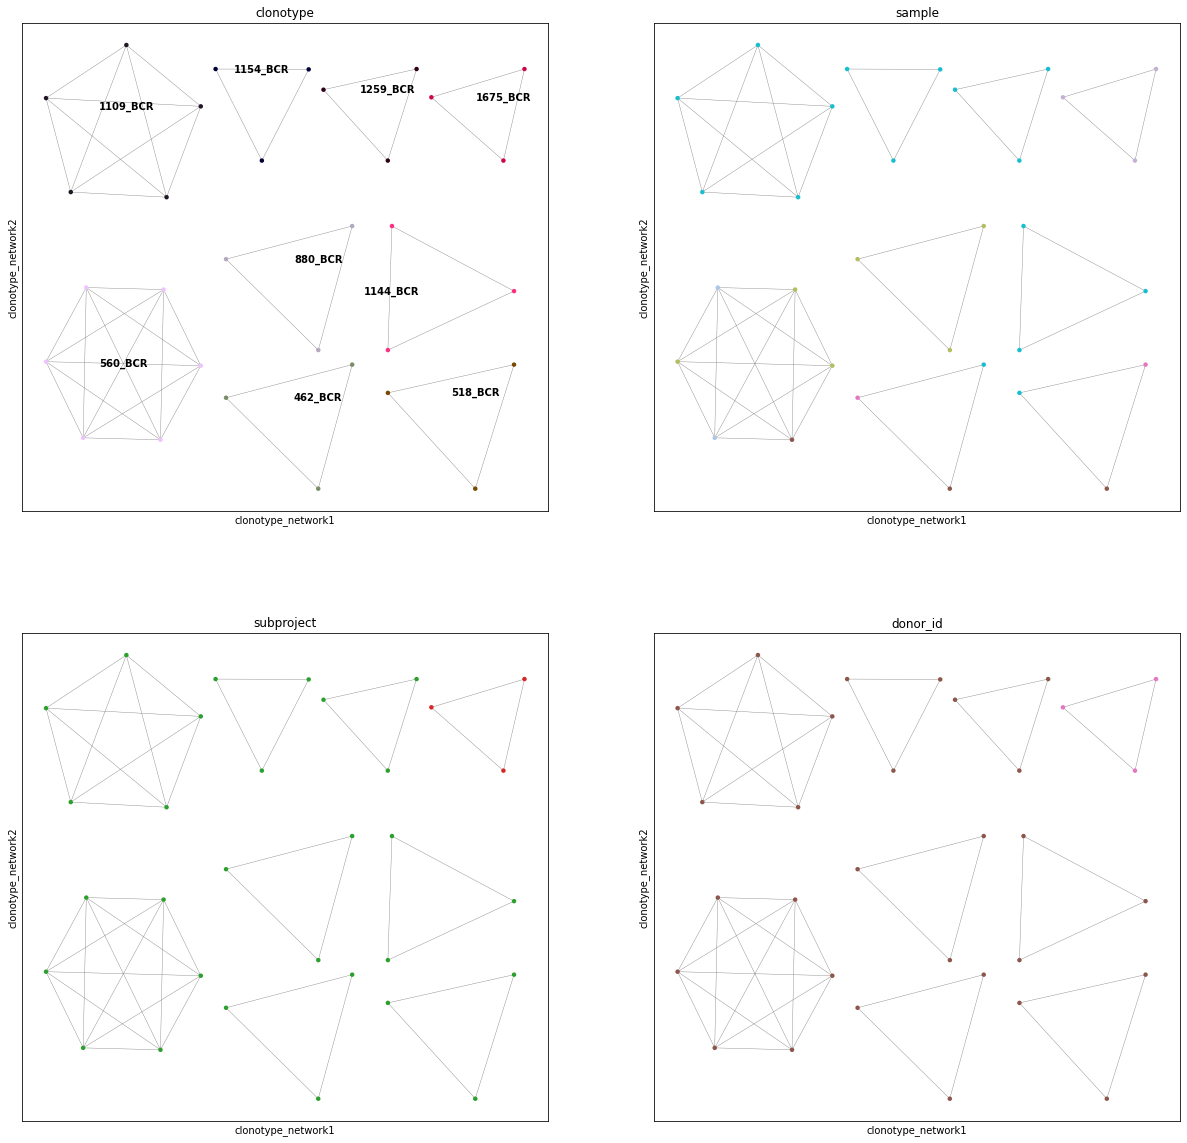

In [17]:
ir.tl.clonotype_network(BCR_adata, min_size=3, sequence = "nt", metric="identity")
ir.pl.clonotype_network(
    BCR_adata,
    color=["clonotype", "sample", "subproject", "donor_id"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "lower center", "lower center"]
    
)
plt.show()

array([<AxesSubplot:title={'center':'subproject'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

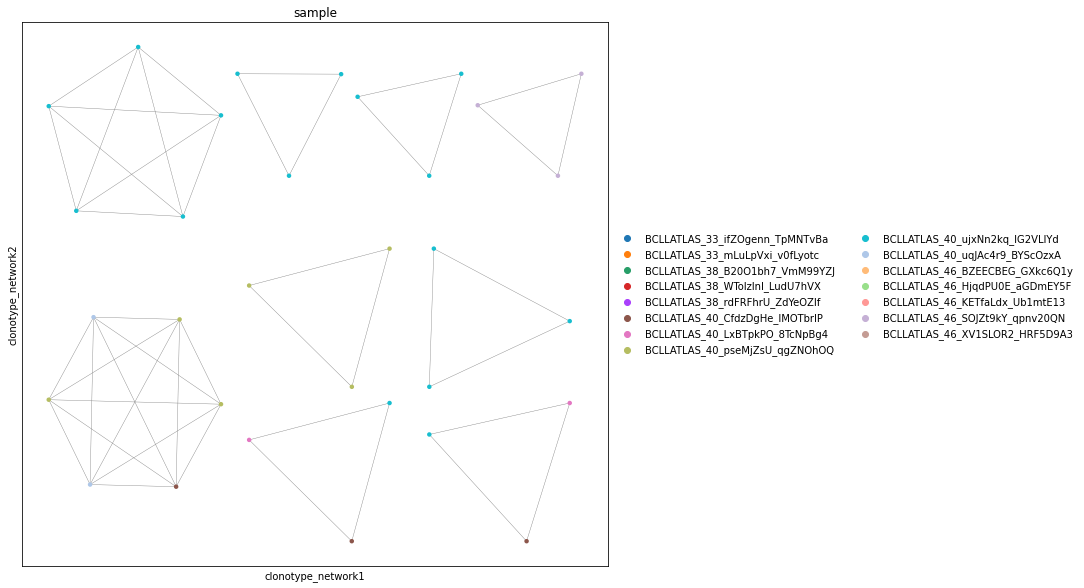

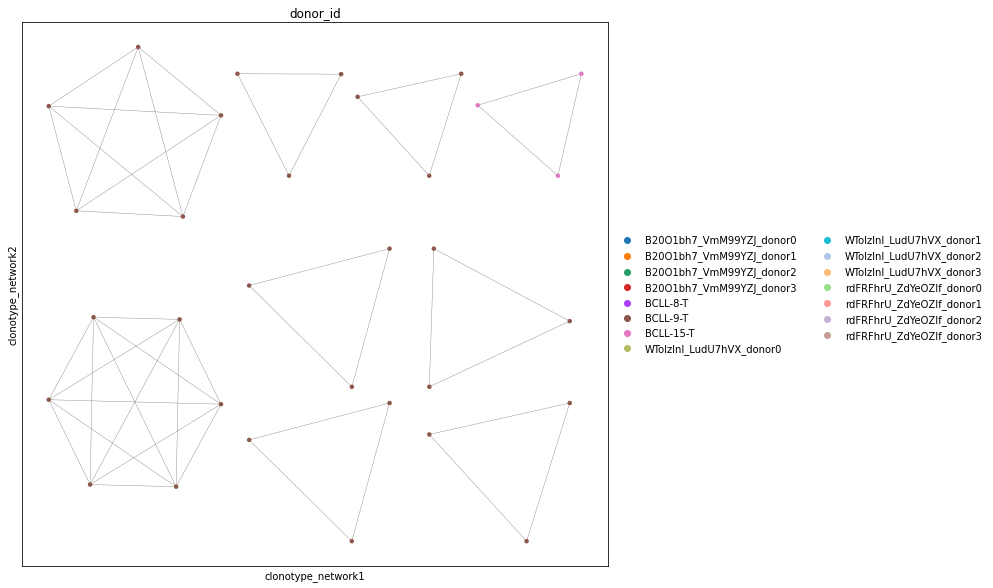

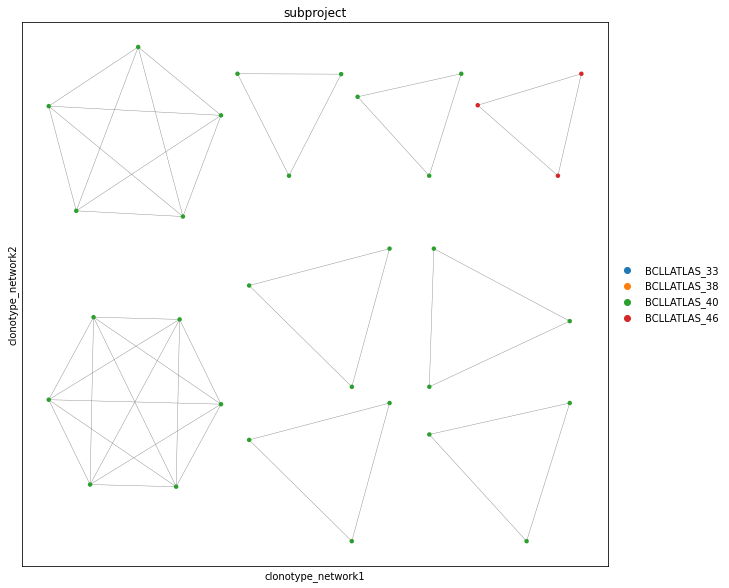

In [18]:
ir.pl.clonotype_network(BCR_adata, color="sample", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="donor_id", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="subproject", size=80, panel_size=(10, 10))

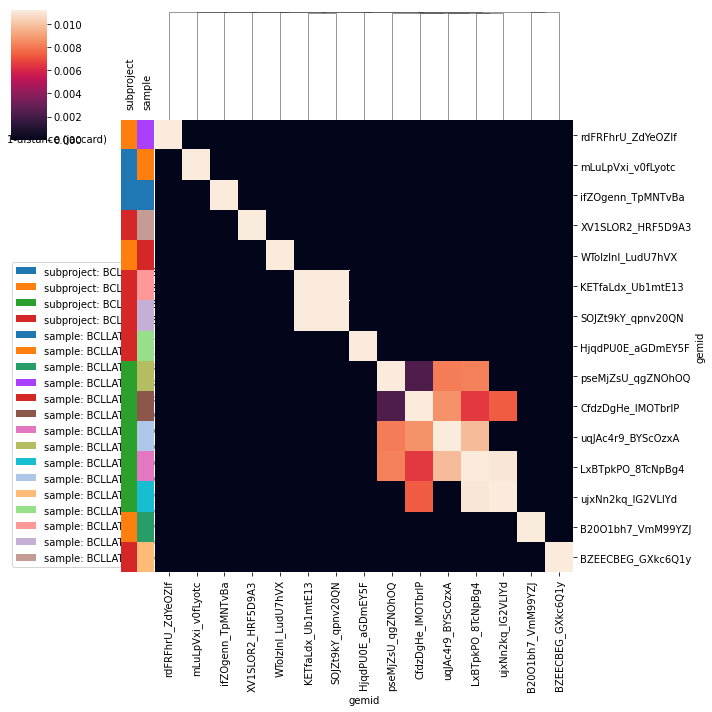

In [19]:
# using clonotype NT sequence
ir.tl.repertoire_overlap(BCR_adata, 
                         groupby="gemid", 
                         target_col="clonotype",
                         overlap_measure="jaccard"
                        )
ax = ir.pl.repertoire_overlap(BCR_adata, 
                              groupby="gemid", 
                              heatmap_cats=["subproject", "sample"],
                              overlap_measure="jaccard",
                              dendro_only=False,
                             )
plt.show()

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
Finished computing VDJ pairwise distances. (0:00:00)
Started comstructing VJ coord-dictionary...
100%|██████████| 1469/1469 [00:00<00:00, 76484.43it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 1720/1720 [00:00<00:00, 84226.91it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 3835/3835 [00:00<00:00, 153873.40it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
... storing 'ct_cluster_aa_identity' as categorical


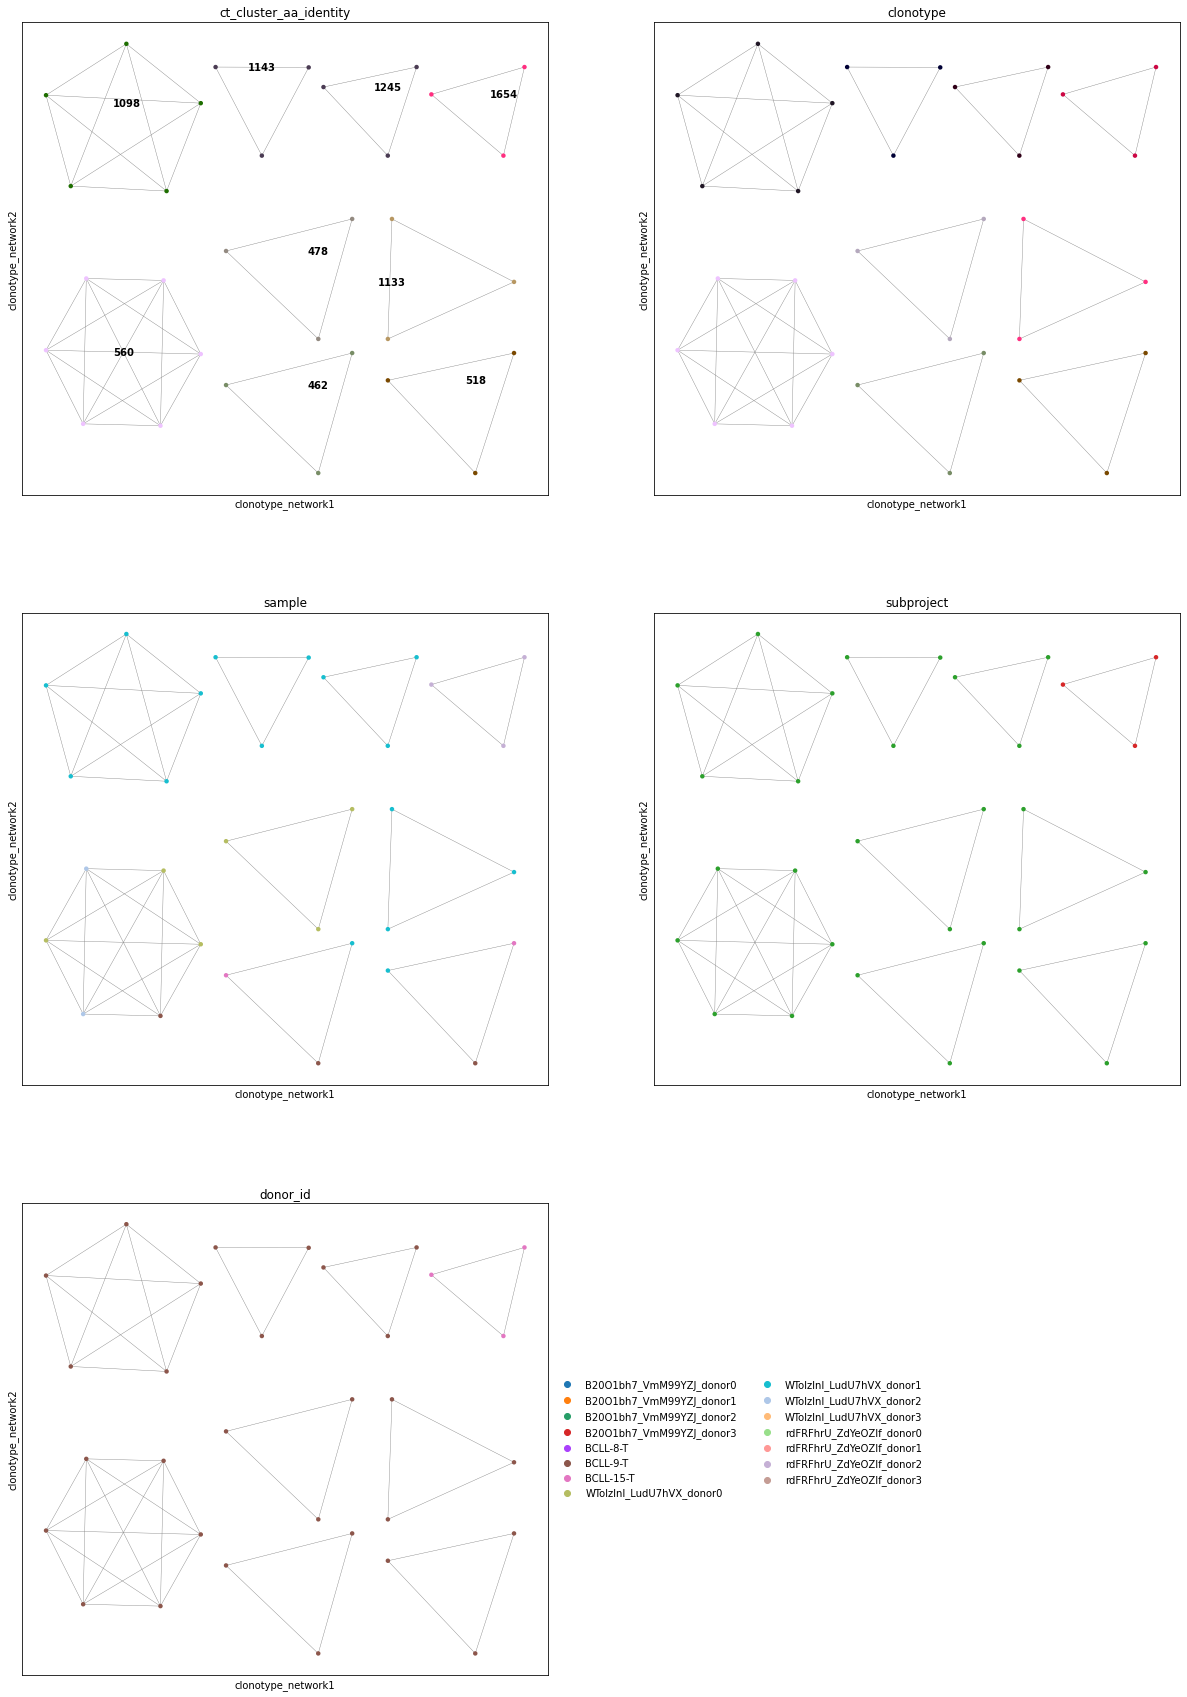

In [20]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(BCR_adata,metric="identity",sequence="aa",cutoff=15,receptor_arms="all",dual_ir="all",)
ir.tl.define_clonotype_clusters(BCR_adata, partitions="connected", sequence="aa", metric="identity", within_group=None)
ir.pl.clonotype_network(
    BCR_adata,
    color=["ct_cluster_aa_identity", "clonotype", "sample", "subproject", "donor_id"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "lower center", "lower center", "right margin"]
    
)
plt.show()

array([<AxesSubplot:title={'center':'subproject'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

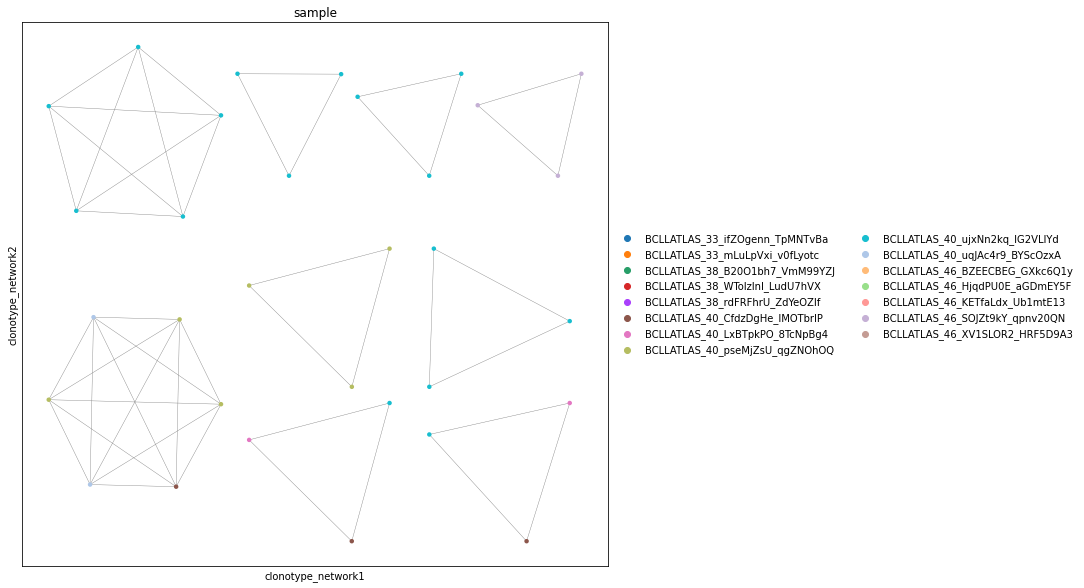

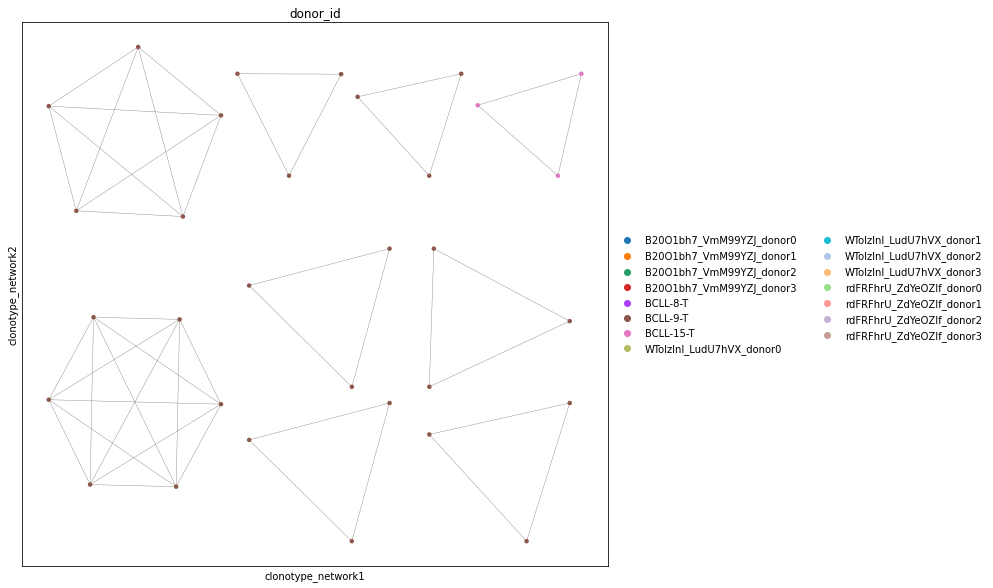

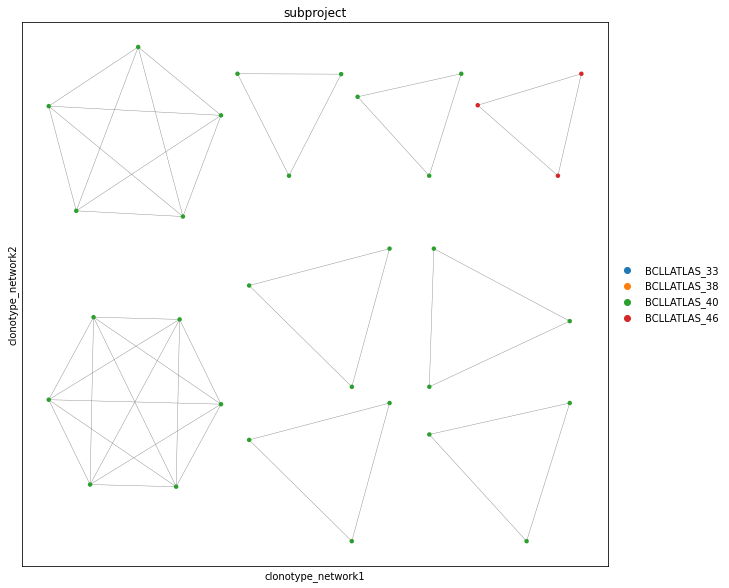

In [21]:
ir.pl.clonotype_network(BCR_adata, color="sample", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="donor_id", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="subproject", size=80, panel_size=(10, 10))

In [22]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(BCR_adata,metric="alignment",sequence="aa",cutoff=10,receptor_arms="all",dual_ir="all",)
ir.tl.define_clonotype_clusters(BCR_adata, partitions="connected", sequence="aa", metric="alignment", within_group=None)

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
100%|██████████| 465/465 [00:03<00:00, 140.64it/s]
Finished computing VJ pairwise distances. (0:00:03)
Computing VDJ pairwise distances...
100%|██████████| 630/630 [00:05<00:00, 125.29it/s]
Finished computing VDJ pairwise distances. (0:00:05)
Started comstructing VJ coord-dictionary...
100%|██████████| 4557/4557 [00:00<00:00, 65928.66it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 1812/1812 [00:00<00:00, 82317.86it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 22815/22815 [00:00<00:00, 112343.74it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
    Started converting distances to connectivities. 
    Finished converting distances to connectivities.  (0:00:00)


In [23]:
ir.tl.clonotype_network(BCR_adata, min_size=3, sequence="aa", metric="alignment")

... storing 'ct_cluster_aa_alignment' as categorical


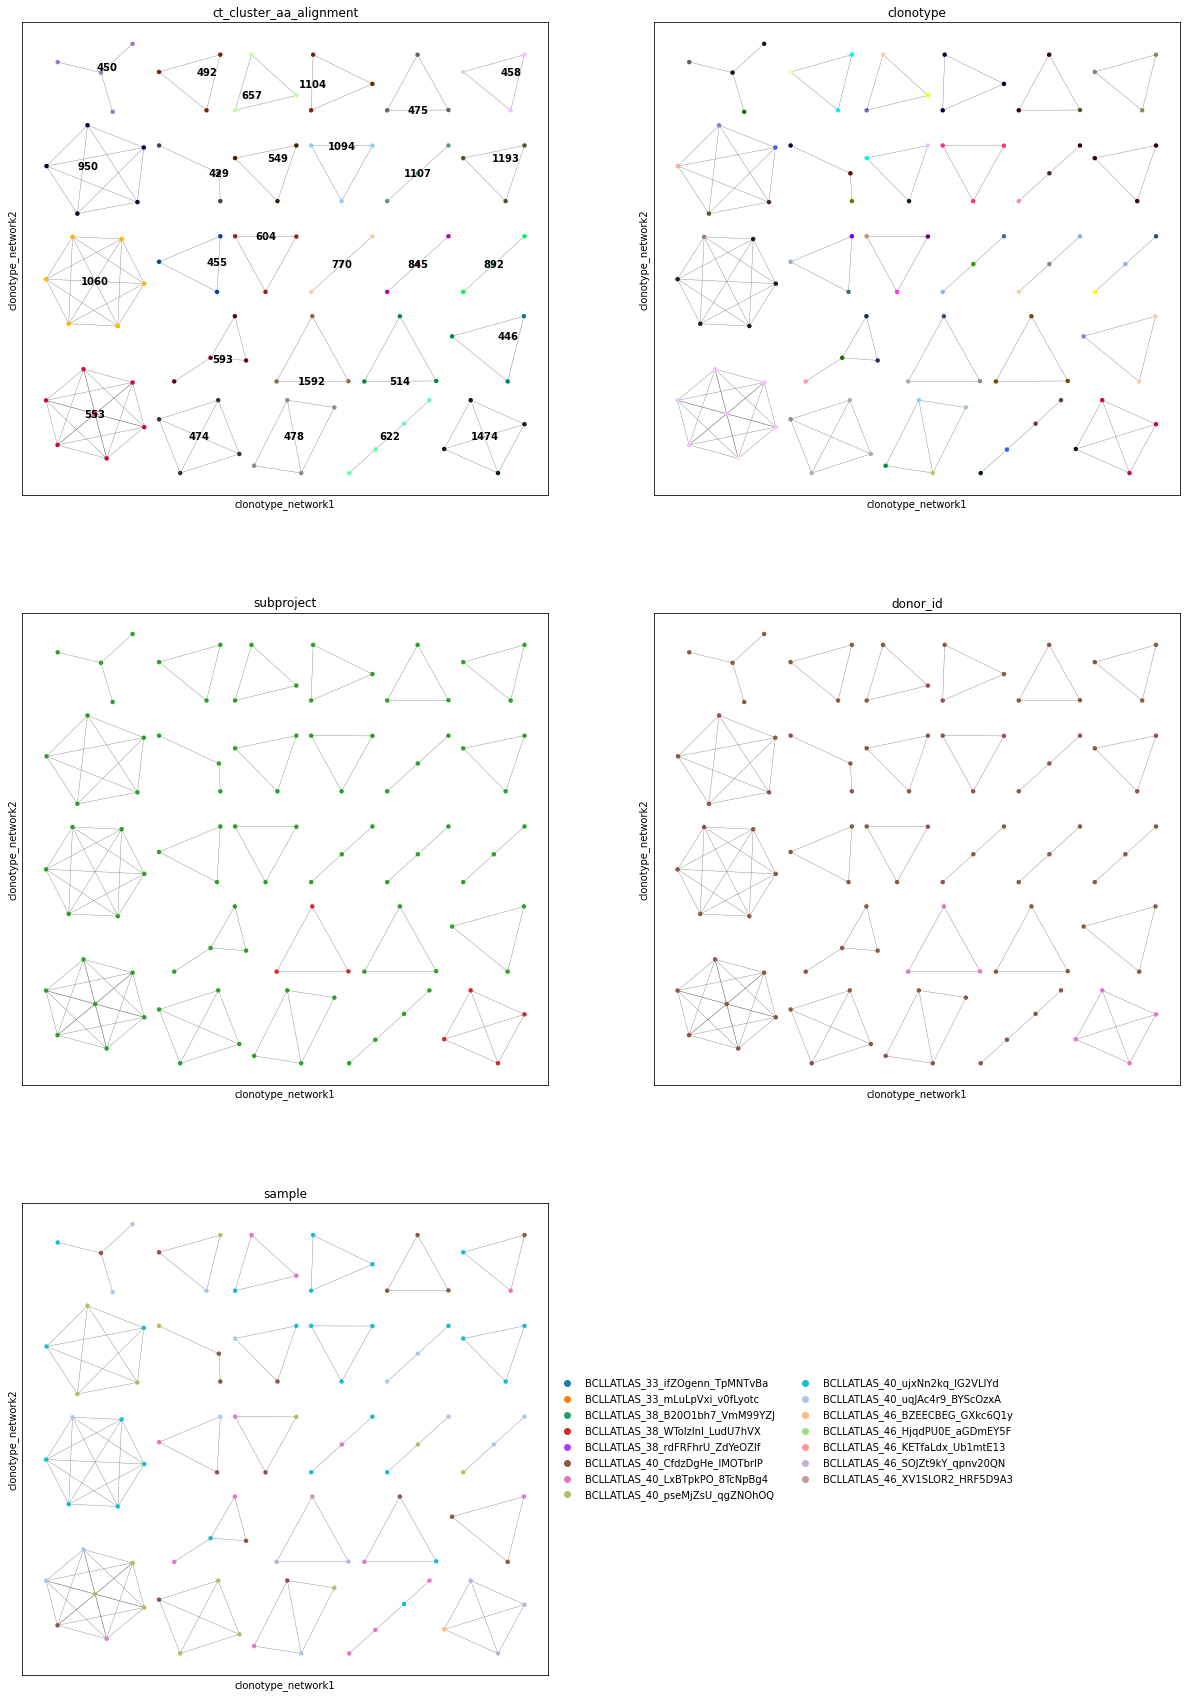

In [24]:
ir.pl.clonotype_network(
    BCR_adata,
    color=["ct_cluster_aa_alignment", "clonotype", "subproject", "donor_id", "sample"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "lower center", "lower center", "right margin"]
    
)
plt.show()

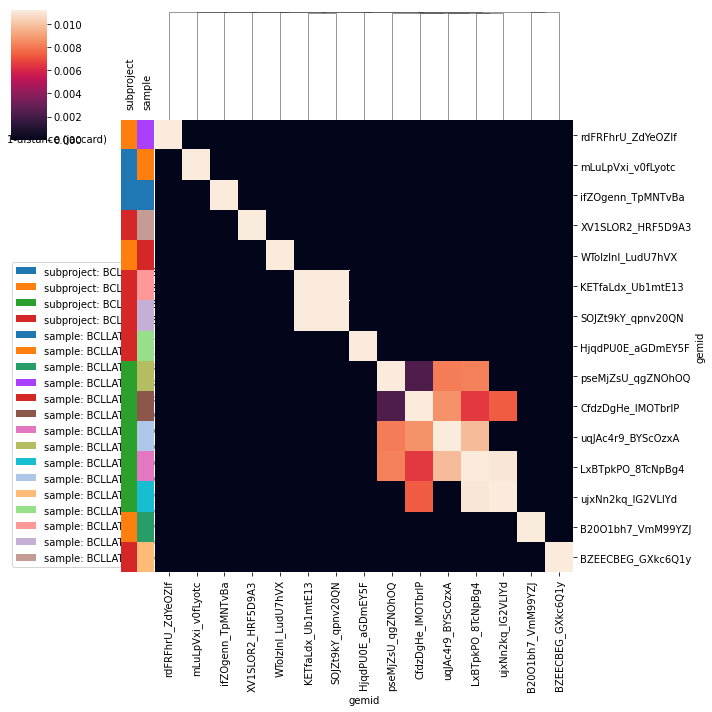

In [25]:
# using clonotype AA sequence
ir.tl.repertoire_overlap(BCR_adata, 
                         groupby="gemid", 
                         target_col="clonotype",
                         overlap_measure="jaccard"
                        )
ax = ir.pl.repertoire_overlap(BCR_adata, 
                              groupby="gemid", 
                              heatmap_cats=["subproject", "sample"],
                              overlap_measure="jaccard",
                              dendro_only=False,
                              added_key='repertoire_overlap',
                              size=30,
                              legend_loc='upper right',
                             )
plt.show()

array([<AxesSubplot:title={'center':'sample'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

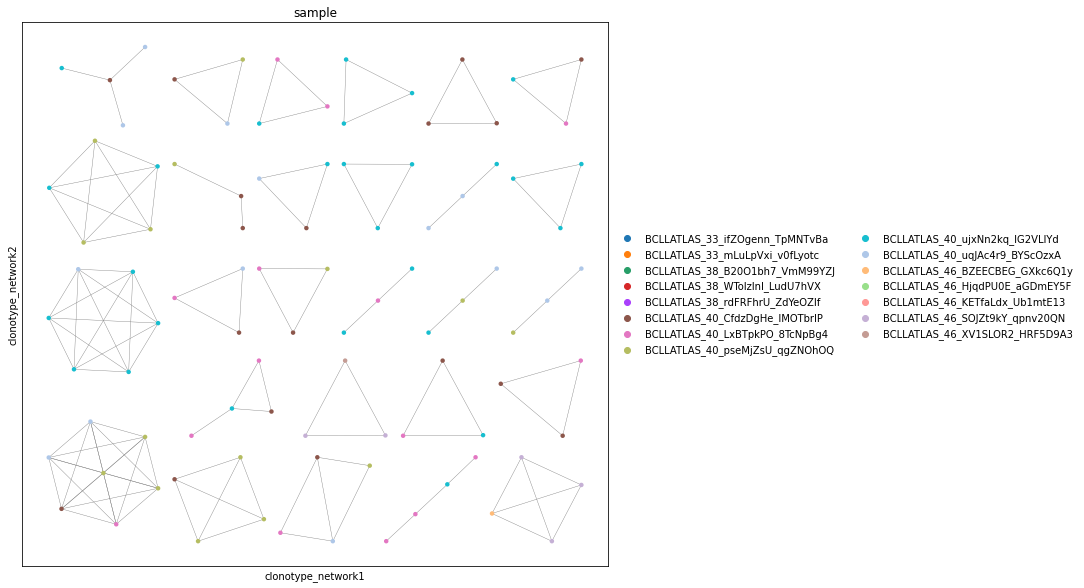

In [26]:
ir.pl.clonotype_network(BCR_adata, color="sample", size=80, panel_size=(10, 10))

array([<AxesSubplot:title={'center':'donor_id'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

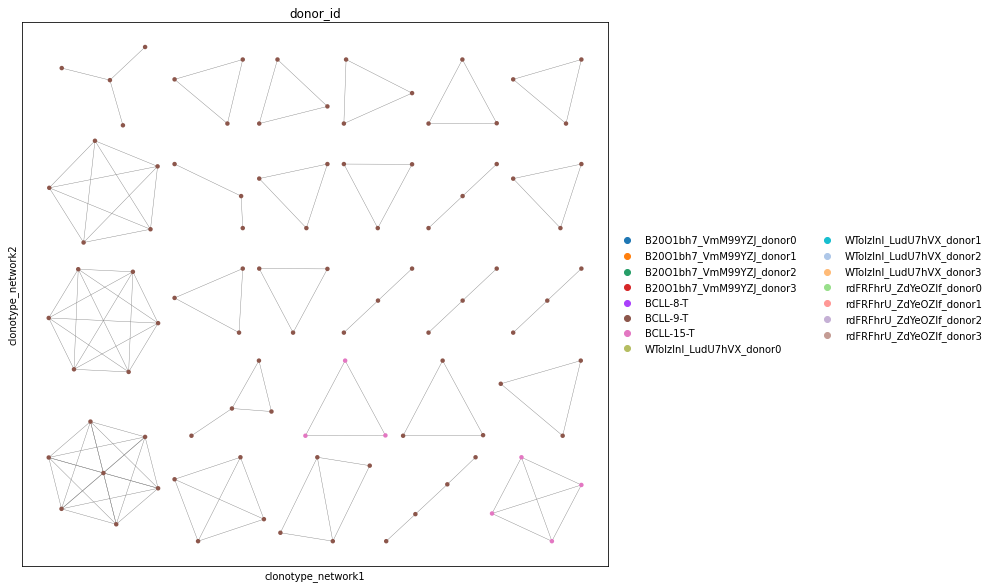

In [27]:
ir.pl.clonotype_network(BCR_adata, color="donor_id", size=80, panel_size=(10, 10))

array([<AxesSubplot:title={'center':'subproject'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

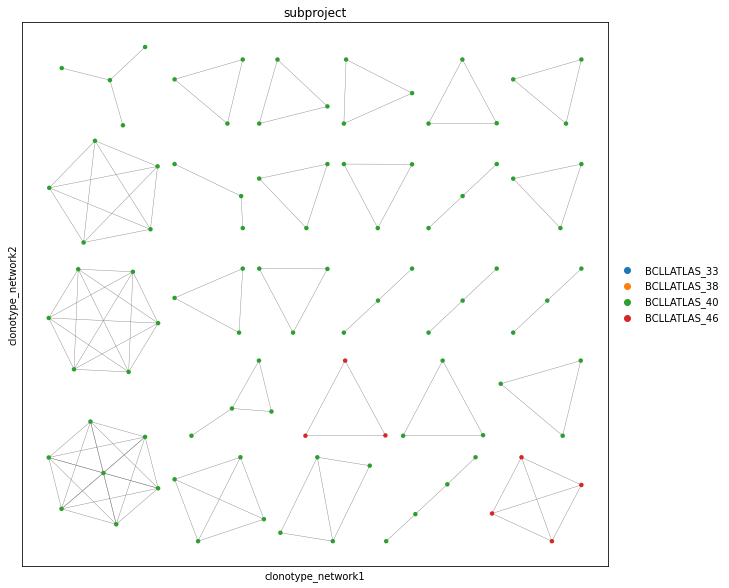

In [28]:
ir.pl.clonotype_network(BCR_adata, color="subproject", size=80, panel_size=(10, 10))

In [29]:
top_cluster=collections.Counter(BCR_adata.obs["ct_cluster_aa_alignment"].to_list()).most_common(1)[0]
BCR_adata.obs.loc[BCR_adata.obs["ct_cluster_aa_alignment"] == top_cluster[0],["IR_VJ_1_cdr3","IR_VJ_2_cdr3","IR_VDJ_1_cdr3","IR_VDJ_2_cdr3","receptor_subtype",],]

,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,receptor_subtype
BCLLATLAS_40_CfdzDgHe_IMOTbrIP_GTCTTCGCATGCAACT-1,CSSFAGTTSVVF,None,CARQSSSESPRRNAFDLW,None,IGH+IGL
BCLLATLAS_40_LxBTpkPO_8TcNpBg4_TAGACCACAAATTGCC-1,CSSFAGTTSVVF,None,CARQSSSERPRRNAFDLW,None,IGH+IGL
BCLLATLAS_40_pseMjZsU_qgZNOhOQ_AGTTGGTTCGTAGGAG-1,CSSFAGTTSVVF,None,CARQSSSESPRRNAFDLW,None,IGH+IGL
BCLLATLAS_40_pseMjZsU_qgZNOhOQ_CCTACCATCGCCTGAG-1,CSSFAGTTSVVF,None,CARQSSSESPRRNAFDLW,None,IGH+IGL
BCLLATLAS_40_pseMjZsU_qgZNOhOQ_CTAATGGGTGATAAAC-1,CSSFAGTTSVVF,None,CARQSSSESPRRNAFDLW,None,IGH+IGL
BCLLATLAS_40_uqJAc4r9_BYScOzxA_CATTCGCCACACATGT-1,CSSFAGTTSVVF,None,CARQSSSESPRRNAFDLW,None,IGH+IGL
BCLLATLAS_40_uqJAc4r9_BYScOzxA_TGACTTTTCTTGTATC-1,CSSFAGTTSVVF,None,CARQSSSESPRRNAFDLW,None,IGH+IGL


In [30]:
ir.tl.define_clonotype_clusters(BCR_adata,sequence="aa",metric="alignment",same_v_gene="primary_only",key_added="ct_cluster_aa_alignment_same_v",)

In [31]:
# find clonotypes with more than one `clonotype_same_v`
ct_different_v = BCR_adata.obs.groupby("ct_cluster_aa_alignment").apply(lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1)
ct_different_v = ct_different_v[ct_different_v].index.values
ct_different_v

['442', '605', '622', '776', '852', '1048', '1060']
Categories (1664, object): ['0', '1', '2', '3', ..., '1660', '1661', '1662', '1663']

In [32]:
# Display the first 2 clonotypes with different v genes
BCR_adata.obs.loc[BCR_adata.obs["ct_cluster_aa_alignment"].isin(ct_different_v[:2]),["clonotype","ct_cluster_aa_alignment","ct_cluster_aa_alignment_same_v","IR_VJ_1_v_gene","IR_VDJ_1_v_gene",],].sort_values("ct_cluster_aa_alignment").drop_duplicates().reset_index(drop=True)

,clonotype,ct_cluster_aa_alignment,ct_cluster_aa_alignment_same_v,IR_VJ_1_v_gene,IR_VDJ_1_v_gene
0,446_BCR,442,442_IGKV2D-28_IGHV3-73_BCR,IGKV2D-28,IGHV3-73
1,1347_BCR,442,442_IGKV2-28_IGHV3-64_BCR,IGKV2-28,IGHV3-64
2,615_BCR,605,605_IGKV1-6_IGHV3-66_BCR,IGKV1-6,IGHV3-66
3,957_BCR,605,605_IGKV1-8_IGHV3-66_BCR,IGKV1-8,IGHV3-66


... storing 'ct_cluster_aa_alignment_same_v' as categorical
... storing 'clonal_expansion' as categorical


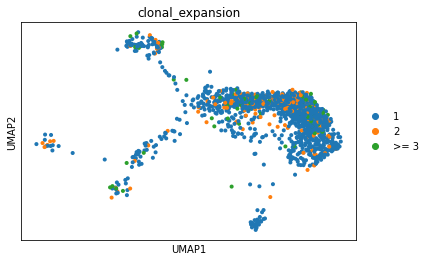

In [33]:
ir.tl.clonal_expansion(BCR_adata, target_col = "ct_cluster_aa_alignment_same_v")
sc.pl.umap(BCR_adata, color=["clonal_expansion"])

<AxesSubplot:>

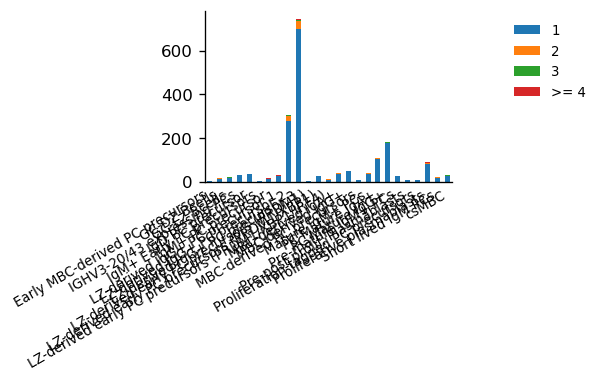

In [34]:
ir.pl.clonal_expansion(BCR_adata, groupby="cluster", clip_at=4, normalize=False)

<AxesSubplot:>

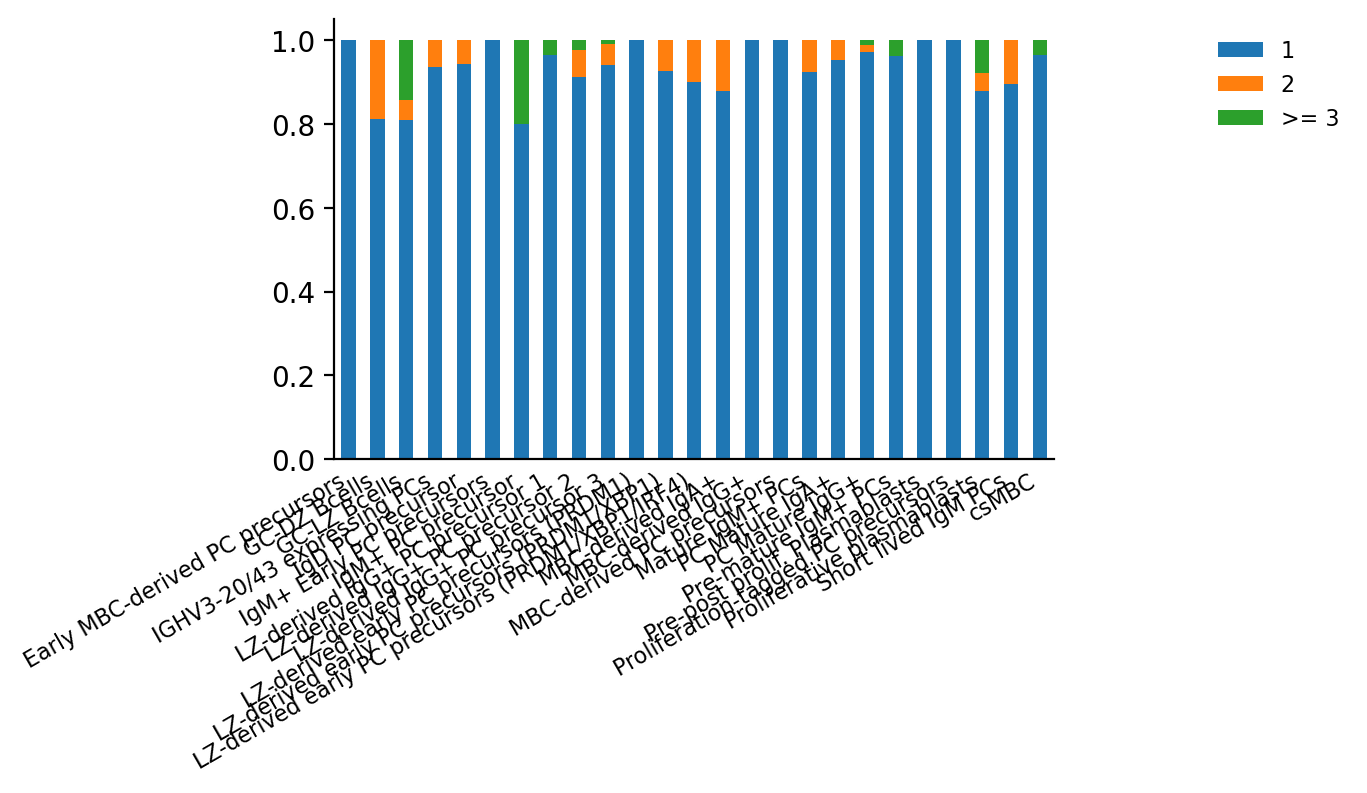

In [35]:
ir.pl.clonal_expansion(BCR_adata, "cluster", fig_kws={"dpi": 200})

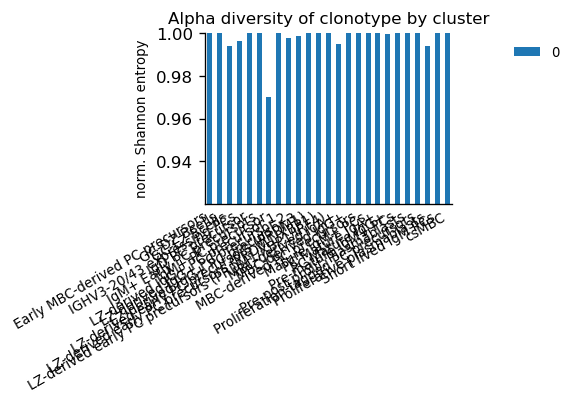

In [36]:
ax = ir.pl.alpha_diversity(BCR_adata, groupby="cluster")

<AxesSubplot:title={'center':'Number of cells in clonotype by cluster'}, xlabel='clonotype', ylabel='Number of cells'>

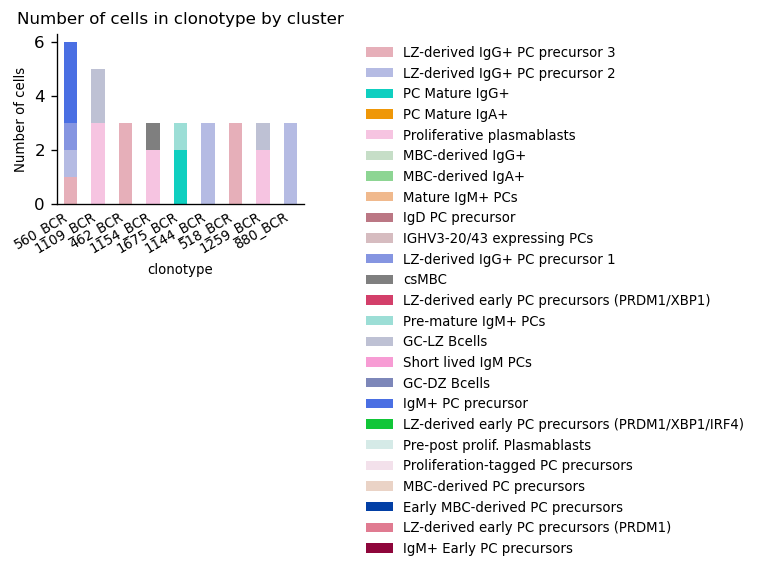

In [37]:
ir.pl.group_abundance(BCR_adata, groupby="clonotype",target_col="cluster", max_cols=9)

<AxesSubplot:title={'center':'Fraction of cluster in each clonotype'}, xlabel='clonotype', ylabel='Fraction of cells in sample'>

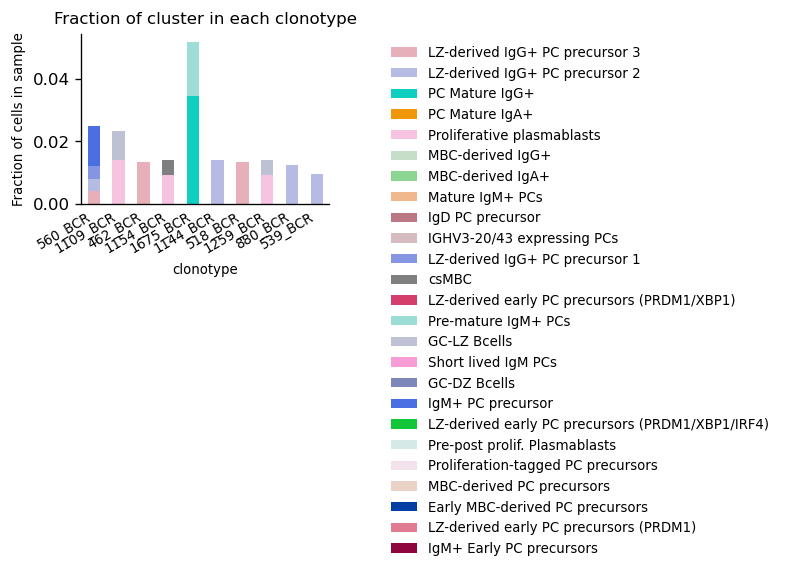

In [38]:
ir.pl.group_abundance(BCR_adata, groupby="clonotype",target_col="cluster", max_cols=10, normalize="sample")

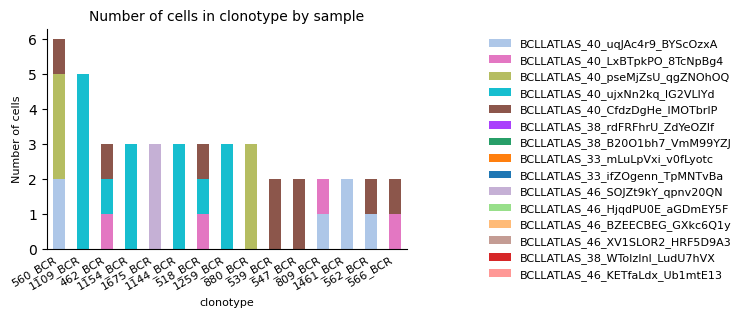

In [39]:
ax = ir.pl.group_abundance(BCR_adata, groupby="clonotype", target_col="sample", max_cols=15, fig_kws={"dpi": 100})

<AxesSubplot:title={'center':'Fraction of has_ir in each IR_VJ_1_v_gene'}, xlabel='IR_VJ_1_v_gene', ylabel='Fraction of cells in has_ir'>

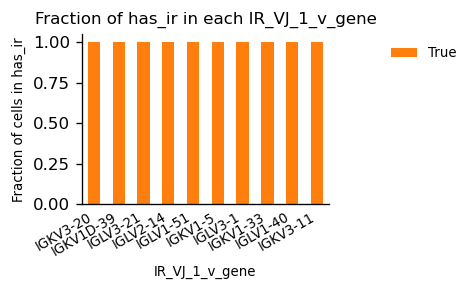

In [40]:
ir.pl.group_abundance(BCR_adata, groupby="IR_VJ_1_v_gene", normalize=True, max_cols=10)

/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (1839×1839).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (1839×1839).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (1839×1

<AxesSubplot:title={'center':'Fraction of IR_VDJ_1_v_gene in each cluster'}, xlabel='cluster', ylabel='Fraction of cells in IR_VDJ_1_v_gene'>

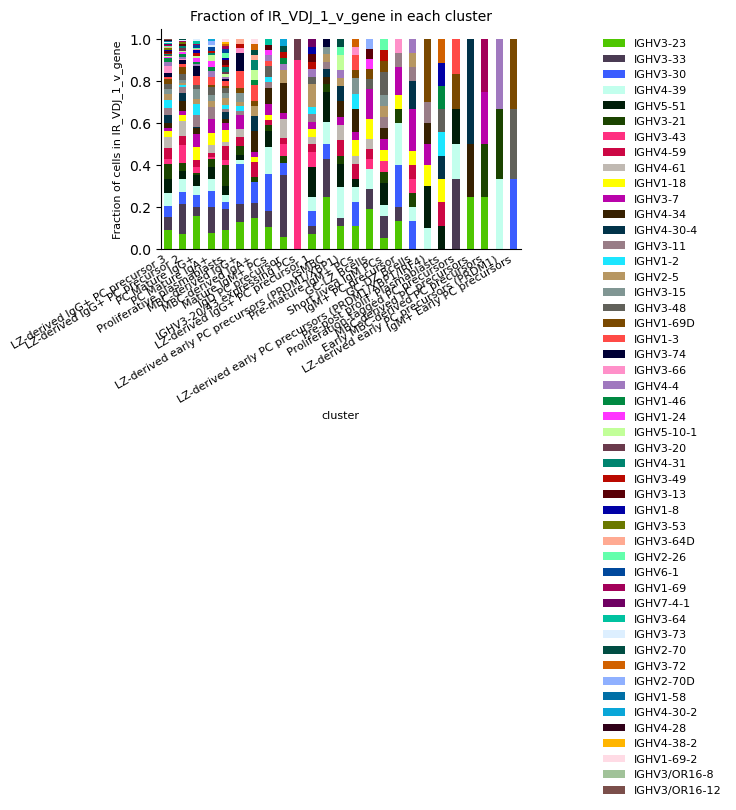

In [41]:
all_gene=BCR_adata.obs["IR_VDJ_1_v_gene"].to_list()
gene_list=[t[0] for t in collections.Counter(all_gene).most_common(10) if str(t[0]) != 'nan']

ir.pl.group_abundance(BCR_adata[BCR_adata.obs["IR_VDJ_1_v_gene"].isin(all_gene),:,],groupby="cluster",target_col="IR_VDJ_1_v_gene",normalize=True,fig_kws={"dpi": 100},)

In [42]:
df = pd.DataFrame(BCR_adata.obs.reset_index()[["IR_VDJ_1_v_gene","cluster"]])
#df=df.groupby(["cluster", "IR_VDJ_1_v_gene"]).size().reset_index(name="freq")
#df.groupby(['cluster',"IR_VDJ_1_v_gene"])['freq'].nlargest(2)
df.groupby(["cluster"])["IR_VDJ_1_v_gene"]

<AxesSubplot:>

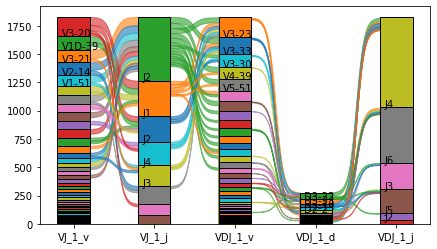

In [43]:
ir.pl.vdj_usage(BCR_adata, full_combination=False, max_segments=None, max_ribbons=30)

['560_BCR', '1109_BCR', '518_BCR', '880_BCR', '1259_BCR', '462_BCR']


<AxesSubplot:>

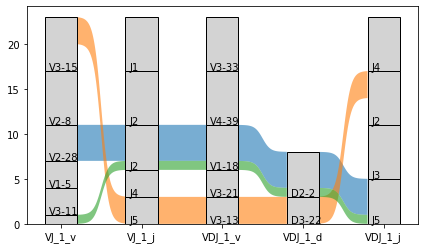

In [44]:
clonotype_list = BCR_adata.obs[BCR_adata.obs["clonal_expansion"] == ">= 3"].sort_values(by=['clonotype_size'], ascending=False)['clonotype'].drop_duplicates().head(6).tolist()
#print(BCR_adata.obs[BCR_adata.obs["ct_cluster_aa_alignment"] == "2"])
print(clonotype_list)
ir.pl.vdj_usage(BCR_adata[BCR_adata.obs["clonotype"].isin(clonotype_list), :],max_ribbons=None,max_segments=30,)

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_cdr3 by cluster'}, xlabel='IR_VJ_1_cdr3 length', ylabel='Number of cells'>

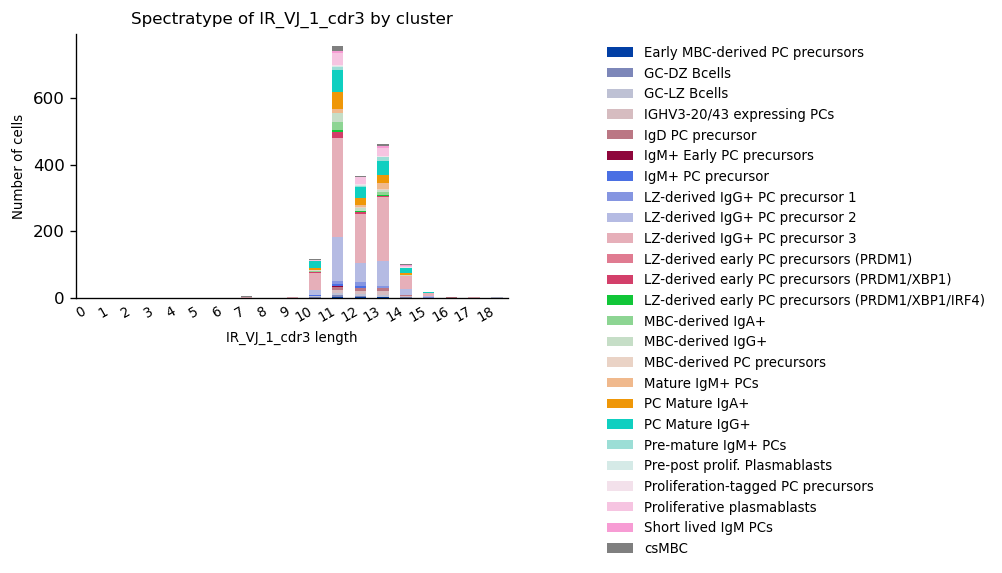

In [45]:
ir.pl.spectratype(BCR_adata, color="cluster", viztype="bar", fig_kws={"dpi": 120})

/home/srashmi/anaconda3/lib/python3.7/site-packages/scirpy/_plotting/base.py:256: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_cdr3 by cluster'}, xlabel='IR_VJ_1_cdr3 length'>

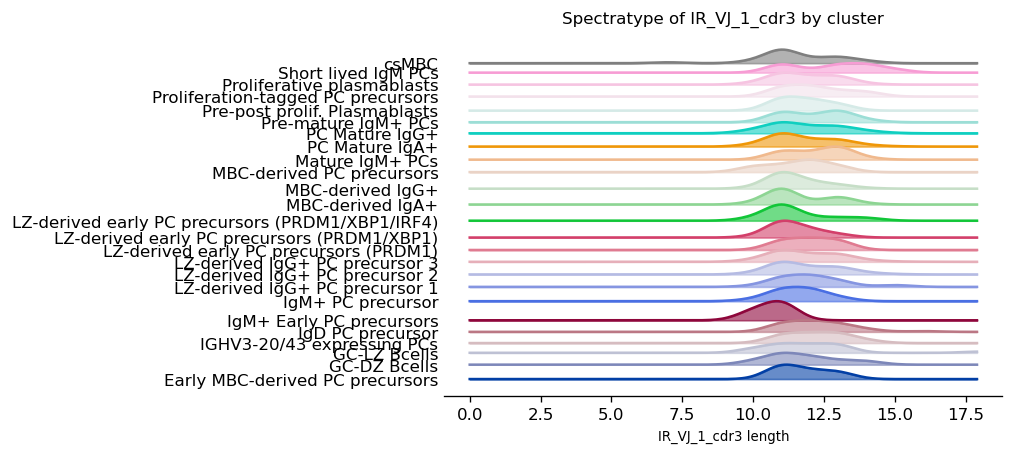

In [46]:
ir.pl.spectratype(BCR_adata,color="cluster",viztype="curve",curve_layout="shifted",fig_kws={"dpi": 120},kde_kws={"kde_norm": False},)

/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (1839×1839).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (1839×1839).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (1839×1

<AxesSubplot:title={'center':'Spectratype of IR_VDJ_1_cdr3 by IR_VDJ_1_v_gene'}, xlabel='IR_VDJ_1_cdr3 length', ylabel='Fraction of cells in sample'>

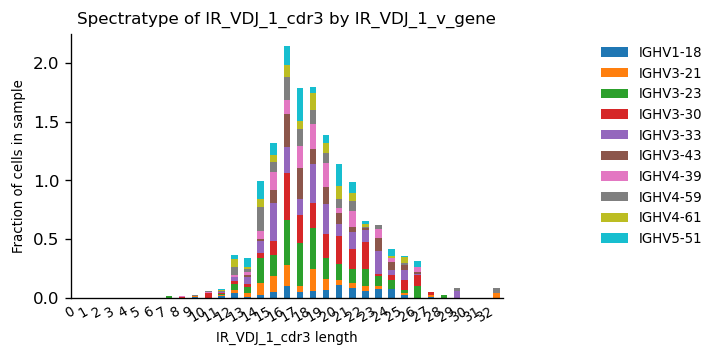

In [47]:
ir.pl.spectratype(BCR_adata[BCR_adata.obs["IR_VDJ_1_v_gene"].isin(gene_list),:,],cdr3_col="IR_VDJ_1_cdr3",color="IR_VDJ_1_v_gene",normalize="sample",fig_kws={"dpi": 120},)

In [48]:
BCR_adata.obs["site"] = BCR_adata.obs["sample"].str.slice(stop=-1)

ValueError: Invalid RGBA argument: nan

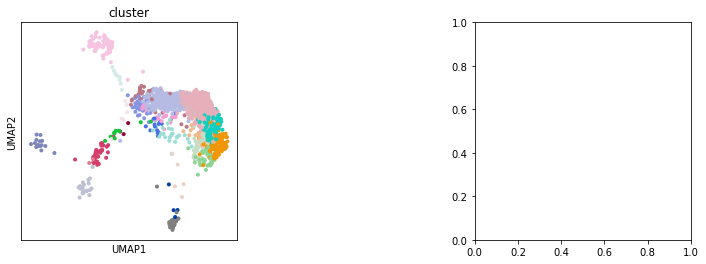

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 1.1})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False, legend_loc = "lower")

sc.pl.umap(BCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in BCR_adata.obs["clonotype"]],palette='tab20',)

In [ ]:
sc.pl.umap(BCR_adata,color="clonotype",groups=clonotype_list,size=[80 if c in clonotype_list else 30 for c in BCR_adata.obs["clonotype"]],palette='tab20',)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={"wspace": 1.1})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False, legend_loc = "lower right")
sc.pl.umap(
    BCR_adata, 
    color=["clonal_expansion"], 
    groups=['2', '>= 3'],
    title="Plasma Cell Clonal Expansion", ax=ax2
)

In [ ]:
#temp_df=BCR_adata.obs
#total_cells = temp_df.groupby(['sample','seurat_clusters'])['orig.ident'].count().reset_index(name='Total_cells')
#ir_freq=temp_df.groupby(['sample','seurat_clusters'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_ir')
#doublet_freq=temp_df.groupby(['sample','seurat_clusters'])['scrublet_predicted_doublet'].apply(lambda x: (x=='True').sum()).reset_index(name='doublet')
#clonotype_freq=temp_df.groupby(['sample','seurat_clusters'])['clonotype_size'].apply(lambda x: (x>1).sum()).reset_index(name='Clonotype_size_more_than_4')
#df_temp = pd.merge(total_cells, doublet_freq, on=['sample','seurat_clusters'])
#df_temp1 = pd.merge(df_temp, ir_freq, on=['sample','seurat_clusters'])
#df = pd.merge(df_temp1, clonotype_freq, on=['sample','seurat_clusters'])
#df.to_csv('BCR_Summarise_scirpy.csv')
#temp_df.to_csv('BCR_Metadata_scirpy.csv')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 1.1})
BCR_adata.obsm['X_umap'] = BCR_adata.obsm['X_adt.umap']
sc.pl.umap(BCR_adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(BCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in BCR_adata.obs["clonotype"]],)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 1.1})
BCR_adata.obsm['X_umap'] = BCR_adata.obsm['X_rna.umap']
sc.pl.umap(BCR_adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(BCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in BCR_adata.obs["clonotype"]],)

In [ ]:
temp_df=BCR_adata.obs
temp_df_complete=adata.obs
total_cells = temp_df_complete.groupby(['cluster'])['orig.ident'].count().reset_index(name='Total_cells')
ir_freq=temp_df.groupby(['cluster'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_BCR')
clonotype_freq=temp_df.groupby(['cluster'])['clonotype_size'].apply(lambda x: (x>=3).sum()).reset_index(name='Clonotype_size_more_than_3')
df_temp = pd.merge(total_cells, ir_freq, on=['cluster'])
df = pd.merge(df_temp, clonotype_freq, on=['cluster'])
df['percent_BCR'] = df.apply(lambda row: row.has_BCR / row.Total_cells *100, axis = 1) 
#print(int(df[total_cells].tolist()))
df.to_csv('Summarise_scirpy_bcr.csv')
temp_df.to_csv('scirpy_bcr_obj_df.csv')
temp_df_complete.to_csv('scirpy_bcr_complete_obj_df.csv')
df

In [ ]:
BCR_adata.obs[BCR_adata.obs['cluster'] == 'IGHV3-20/43 expressing PCs'][['subproject','IR_VDJ_1_v_gene']].value_counts()

In [ ]:
BCR_adata.obs.to_csv("scirpy_obs_out.csv", sep = "\t")

In [ ]:
BCR_adata.obs